Certain ML Algorithms such as Linear regression, logistic regression, LDA, Gaussian Naive Bayes assume that data is normally distributed. For these algorithms we may require to transform our data into normal distribution ,if it is not so.

1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Boxcox Transformation

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 =pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\mtcars.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [3]:
df1.rename(columns={"Unnamed: 0":"Model"},inplace=True)
df1

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


1. Model: This column contains the car model names as character strings. It allows you to identify specific car models within the dataset.
2.  mpg: Miles per gallon (US) - This column represents the fuel efficiency of each car.
3. cyl: Number of cylinders - This indicates the number of cylinders in the car's engine.
4. disp: Displacement (cu.in.) - This represents the total volume of the engine cylinders.
5. hp: Gross horsepower - This indicates the engine's maximum power output.
6. drat: Rear axle ratio - This ratio relates engine revolutions to wheel revolutions.
7. wt: Weight (1000 lbs) - This indicates the car's weight in thousands of pounds.
8. qsec: 1/4 mile time - This represents the elapsed time for each car to complete a quarter-mile drag race.
9. vs: Engine type (0 = V-shaped, 1 = straight) - This is a binary variable indicating the engine configuration.
10. am: Transmission type (0 = automatic, 1 = manual) - This is a binary variable indicating the transmission type.
11. gear: Number of forward gears - This indicates the number of forward gears in the car's transmission.
12. carb: Number of carburetors - This column indicates the number of carburetors in each car. Carburetors were used in older gasoline engines to regulate the air-fuel mixture.


In [4]:
## QQ plot -  A quantile-quantile plot is used to check whether a feature is normally distributed or not
import scipy.stats as stats

def plot_qq_kde(df, feature):
    # Create the Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature}")

    # Create the KDE plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f"KDE Plot for {feature}")

    plt.tight_layout()
    plt.show()

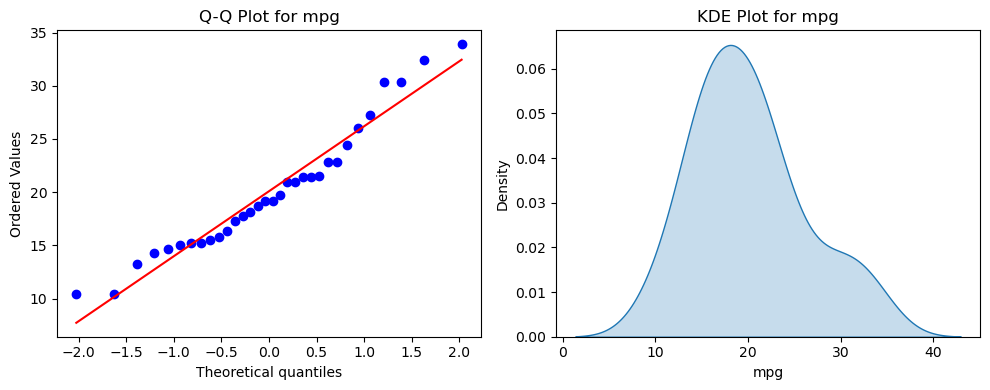

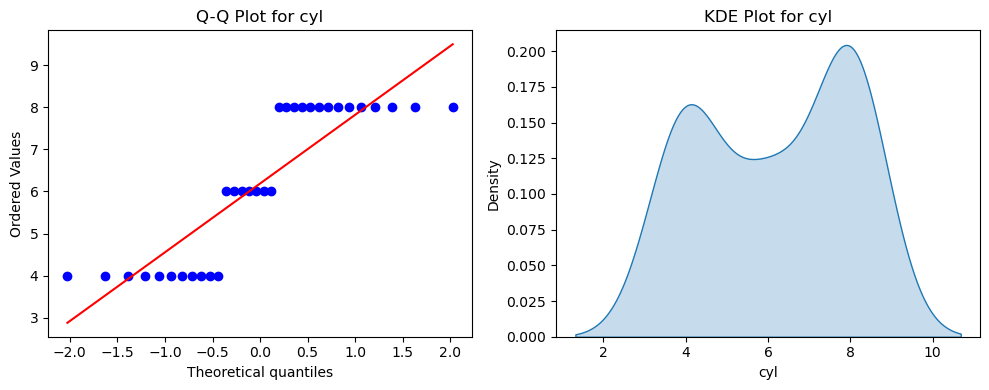

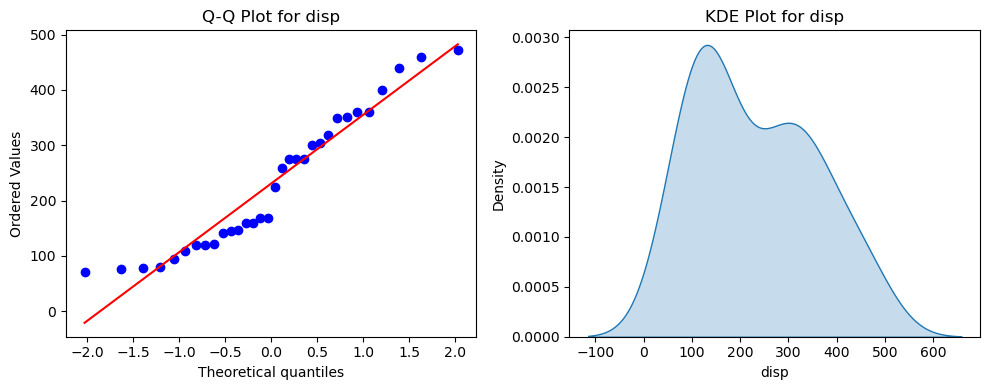

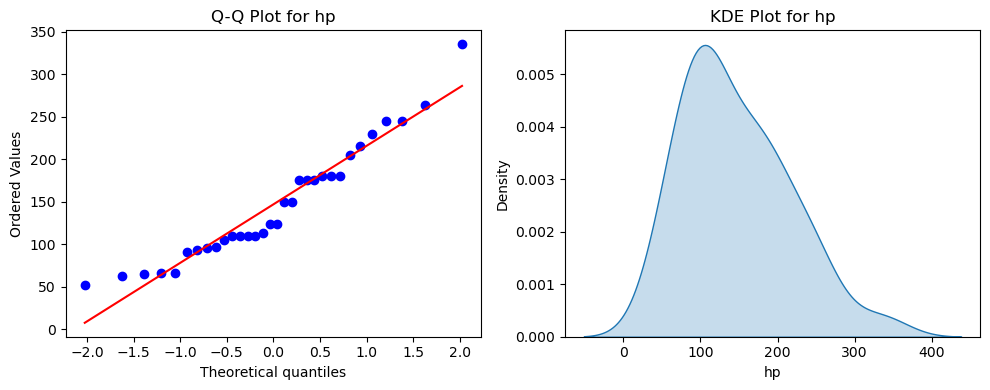

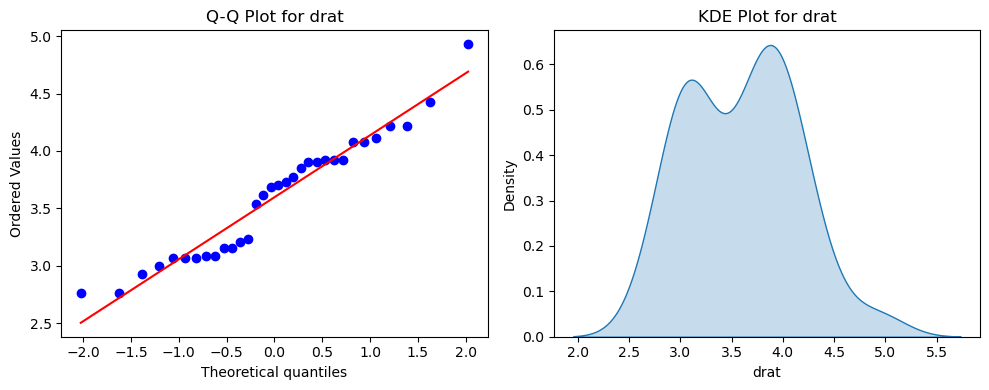

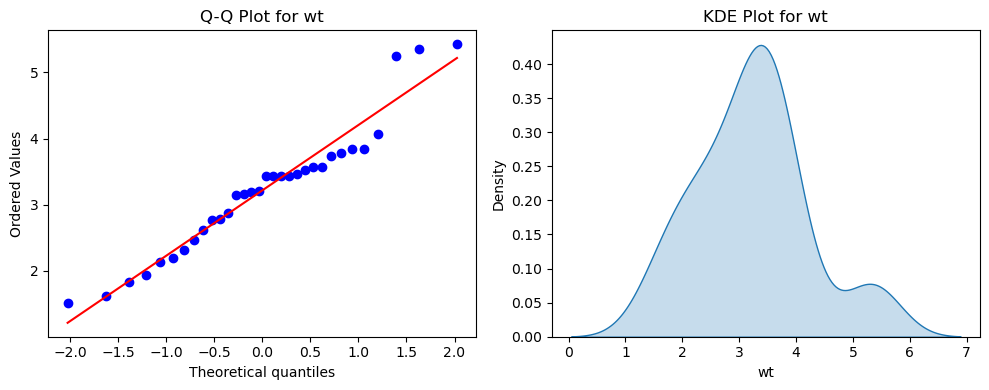

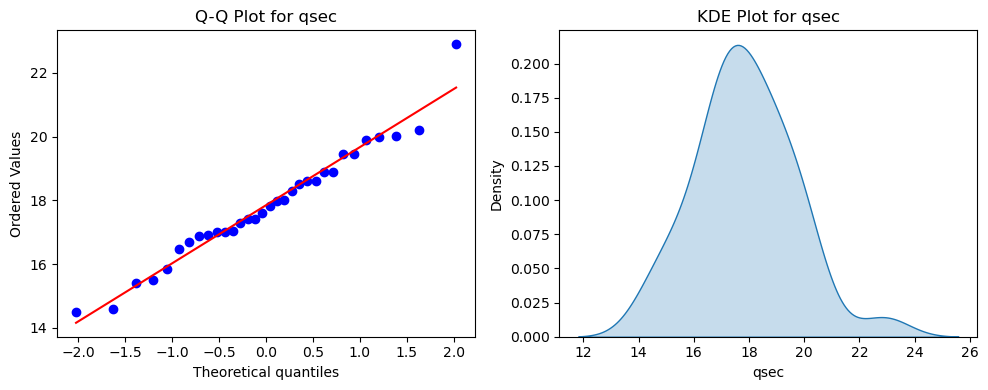

In [5]:
for col in df1.iloc[:,1:8].columns:
    plot_qq_kde(df1,col)

#### Logarithmic Transformation

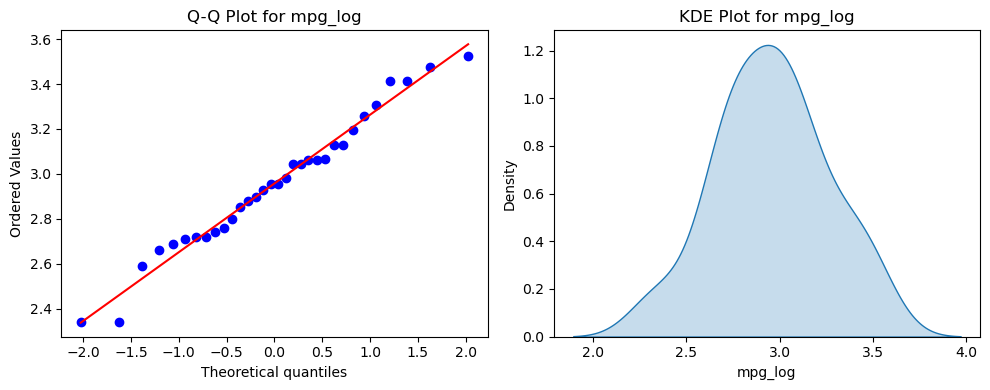

In [6]:
df1["mpg_log"] = np.log(df1["mpg"])
plot_qq_kde(df1,"mpg_log")

#### Reciprocal Transformation

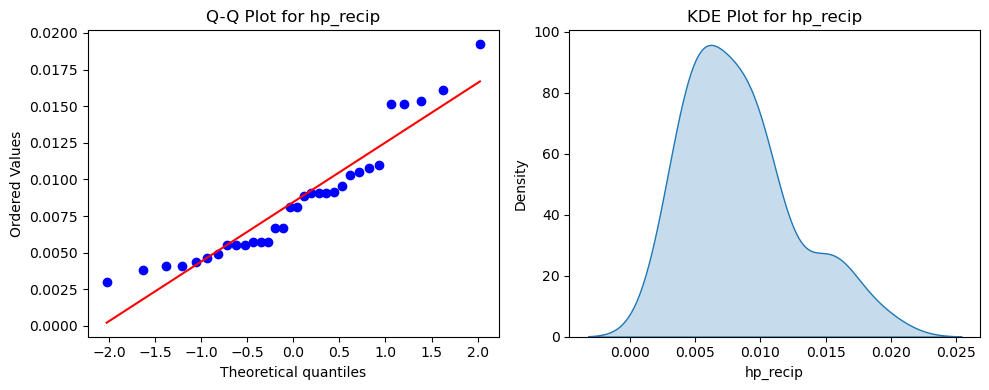

In [7]:
df1['hp_recip'] = 1/df1['hp']
plot_qq_kde(df1,"hp_recip")

#### Square Root Transformation

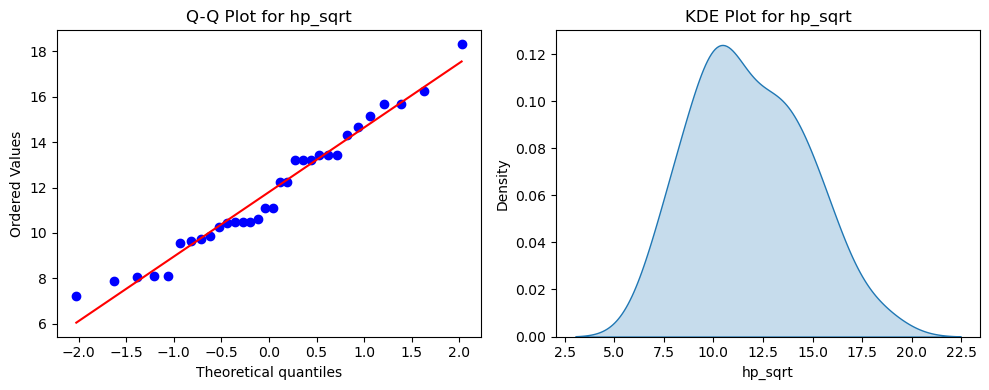

In [8]:
# Square Root Transformation
df1['hp_sqrt'] = np.sqrt(df1['hp'])
plot_qq_kde(df1,"hp_sqrt")

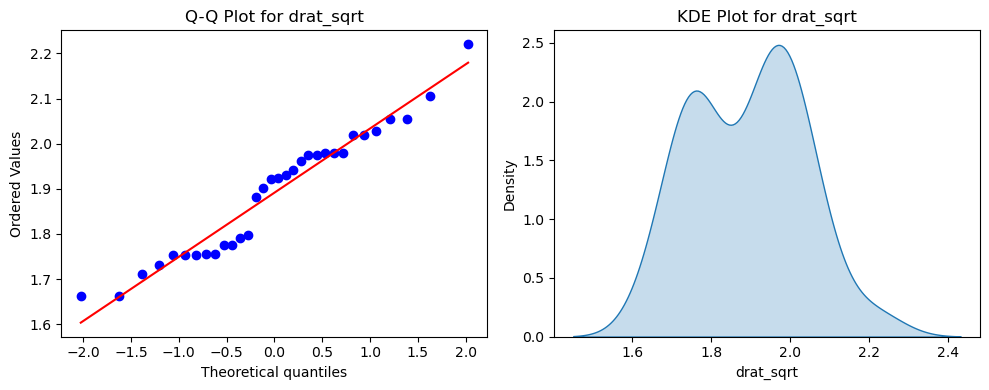

In [9]:
df1['drat_sqrt'] = np.sqrt(df1["drat"])
plot_qq_kde(df1,"drat_sqrt")

#### Box-cox Transformation

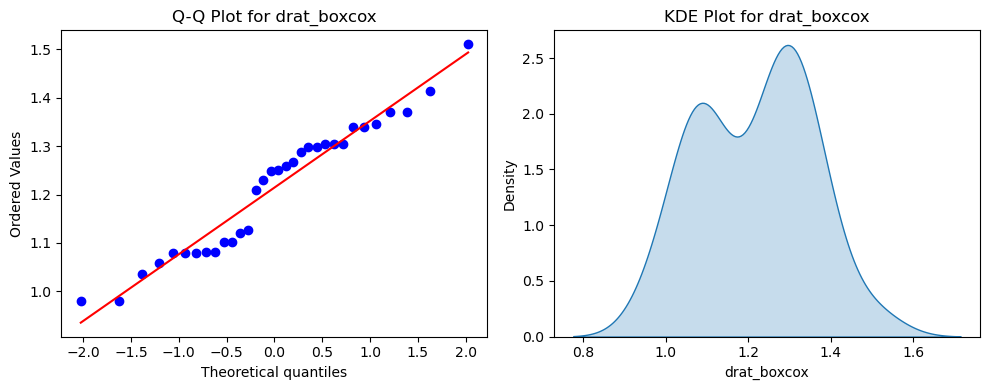

In [10]:
df1['drat_boxcox'],params = stats.boxcox(df1['drat'])
plot_qq_kde(df1,'drat_boxcox')

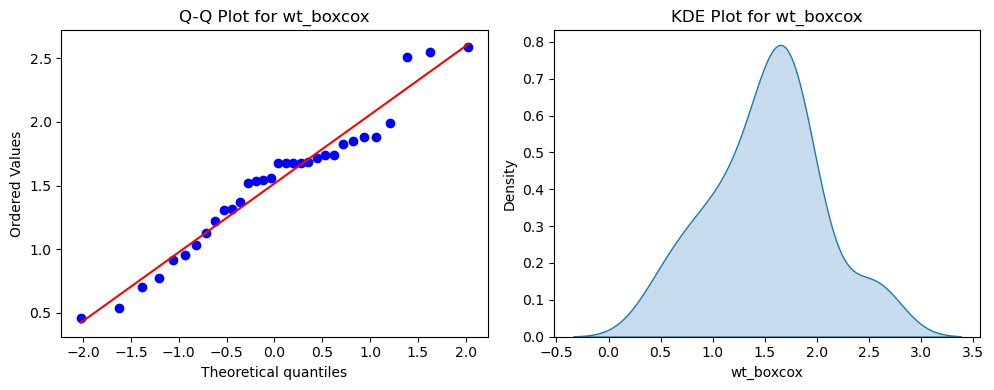

In [11]:
df1["wt_boxcox"],params = stats.boxcox(df1["wt"])
plot_qq_kde(df1,"wt_boxcox")

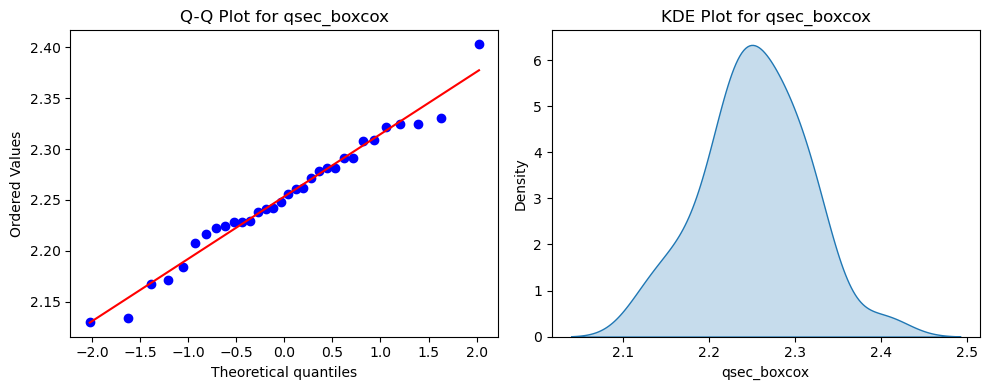

In [12]:
df1["qsec_boxcox"],params = stats.boxcox(df1["qsec"])
plot_qq_kde(df1,"qsec_boxcox")

#### Assignment 
Apply feature transformation techniques to the columns of load_wine dataset present in sklearn

In [13]:
from sklearn.datasets import load_wine
print(load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [14]:
df_1 = pd.DataFrame(load_wine().data,columns=load_wine().feature_names)
df_1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
import scipy.stats as stats

def plot_qq_kde(df_1, feature):
    # Create the Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    stats.probplot(df_1[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature}")

    # Create the KDE plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_1[feature], fill=True)
    plt.title(f"KDE Plot for {feature}")

    plt.tight_layout()
    plt.show()

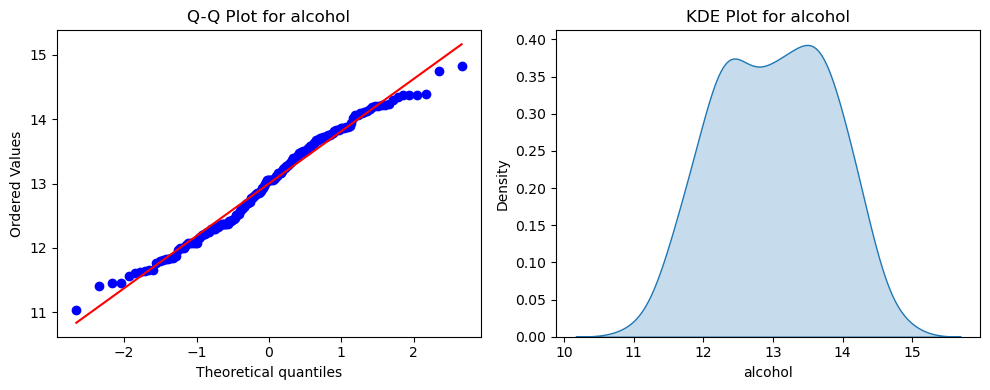

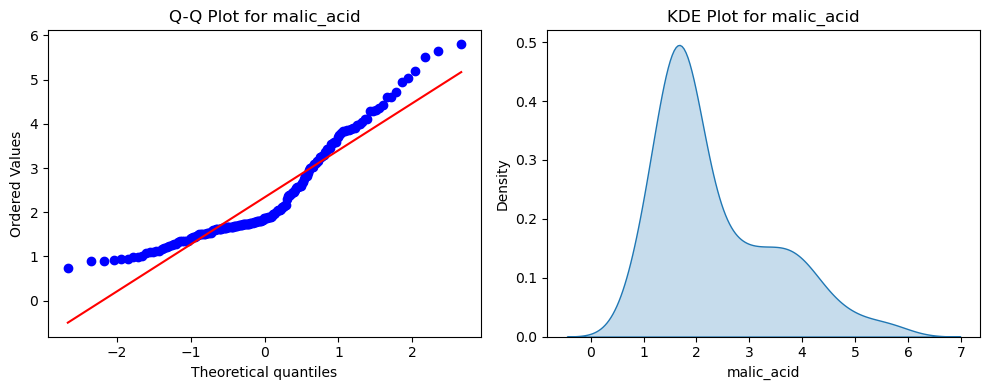

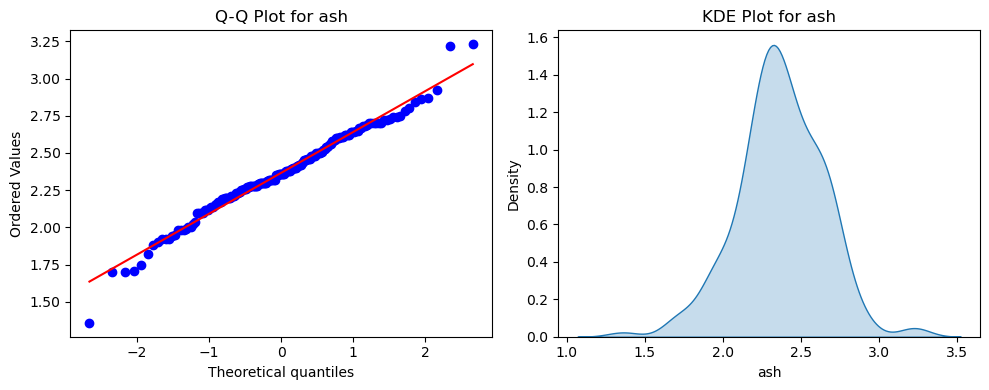

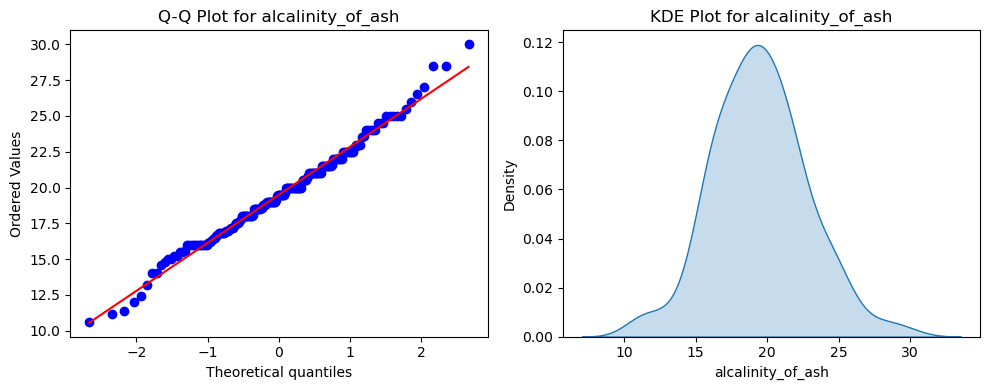

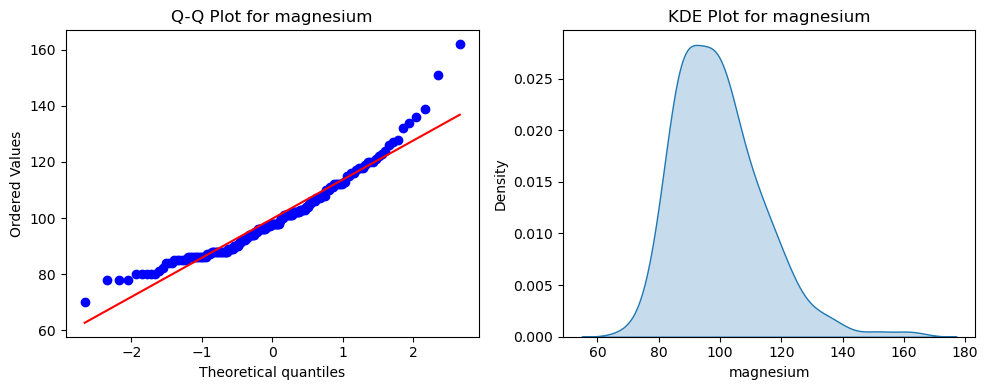

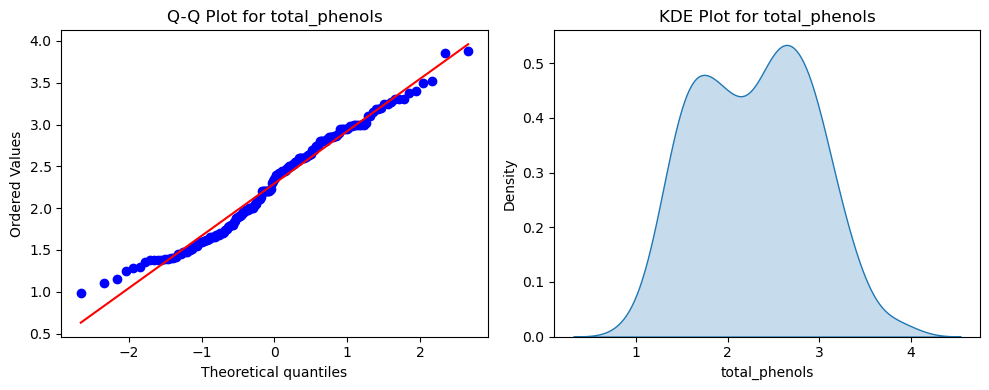

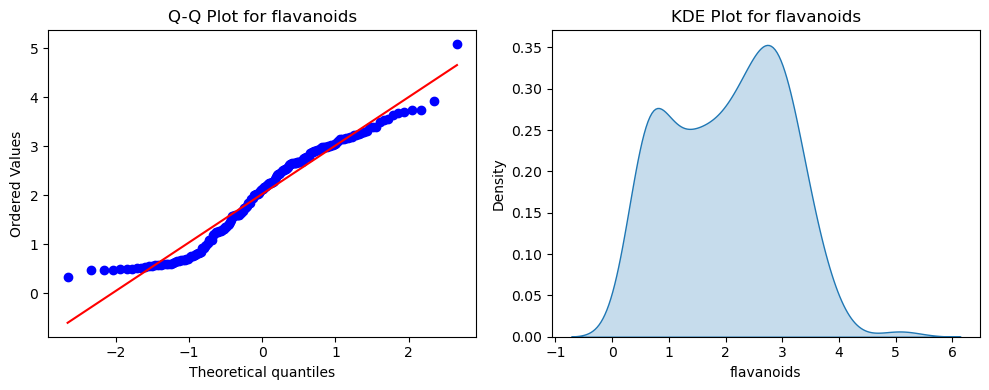

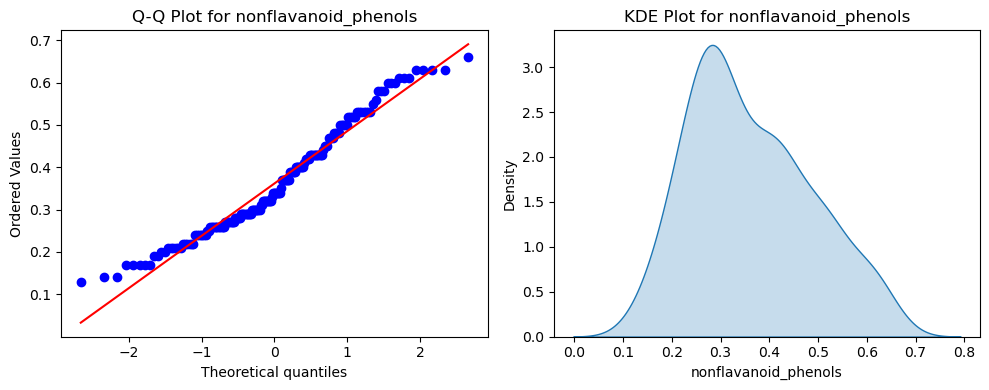

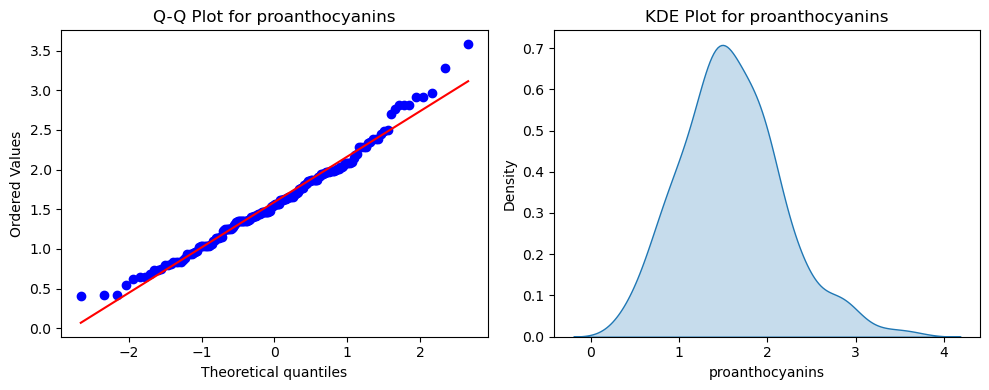

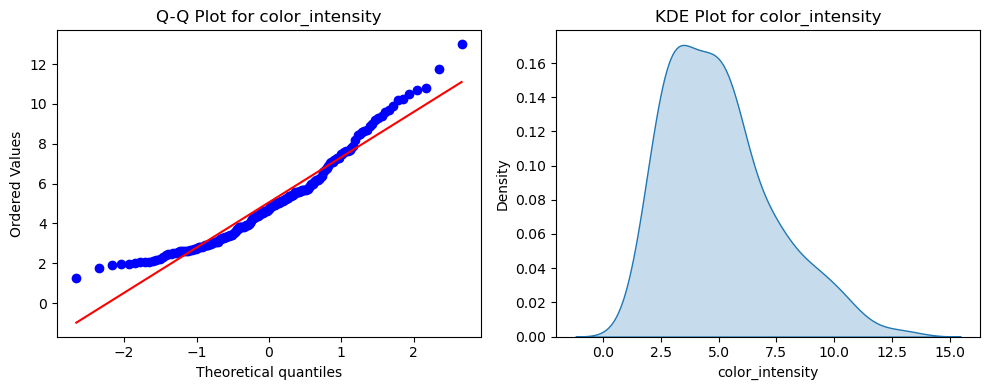

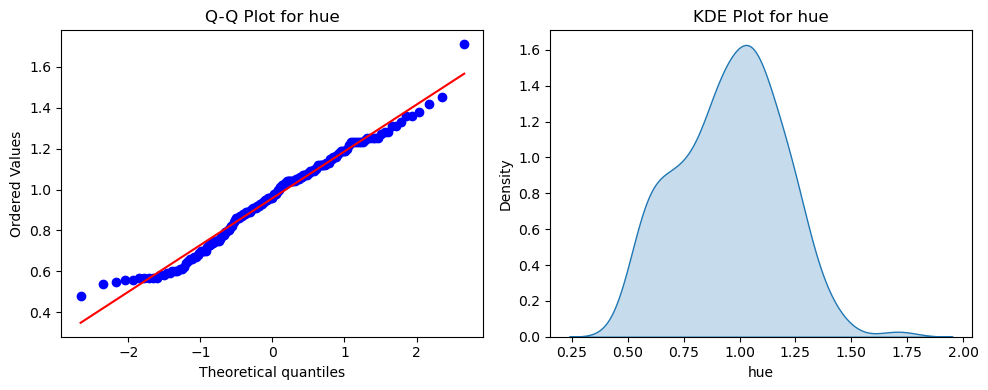

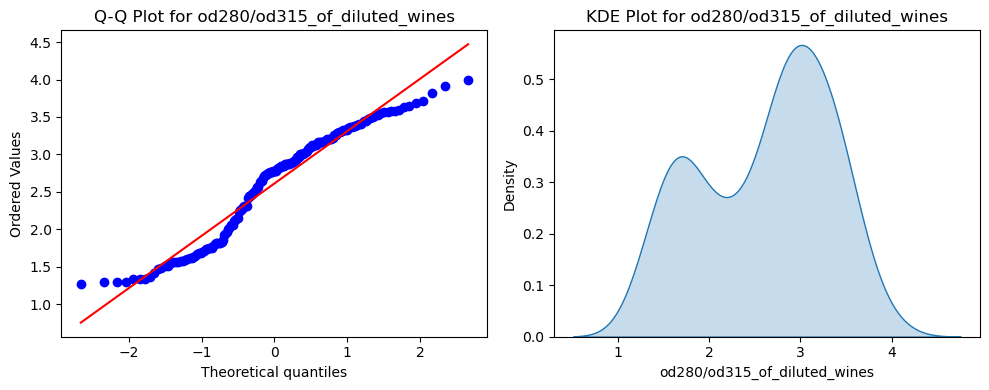

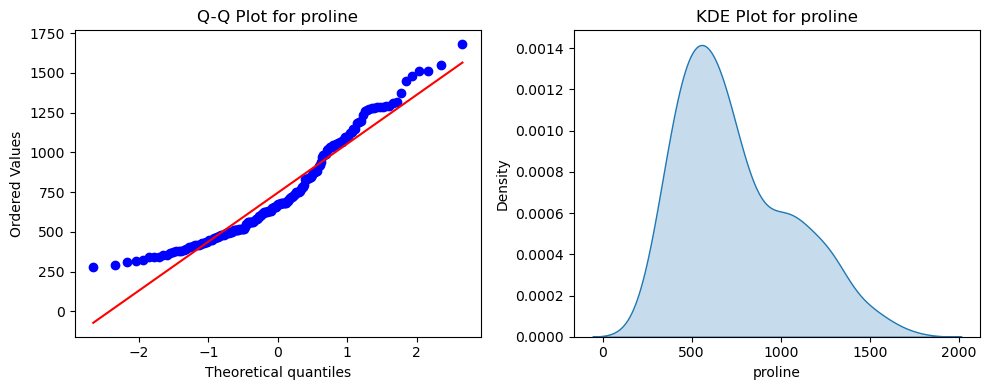

In [16]:
for col in df_1.iloc[:,0:].columns:
    plot_qq_kde(df_1,col)

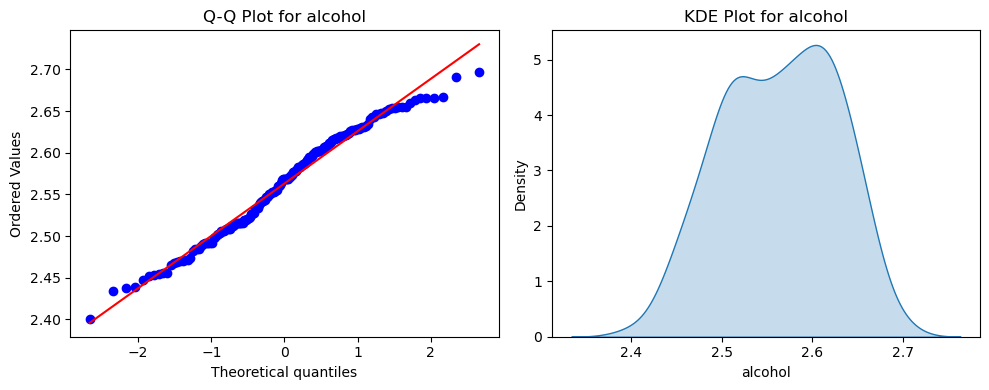

In [17]:
# Logarithmic Transformation
df_1["alcohol"] = np.log(df_1["alcohol"])
plot_qq_kde(df_1,"alcohol")

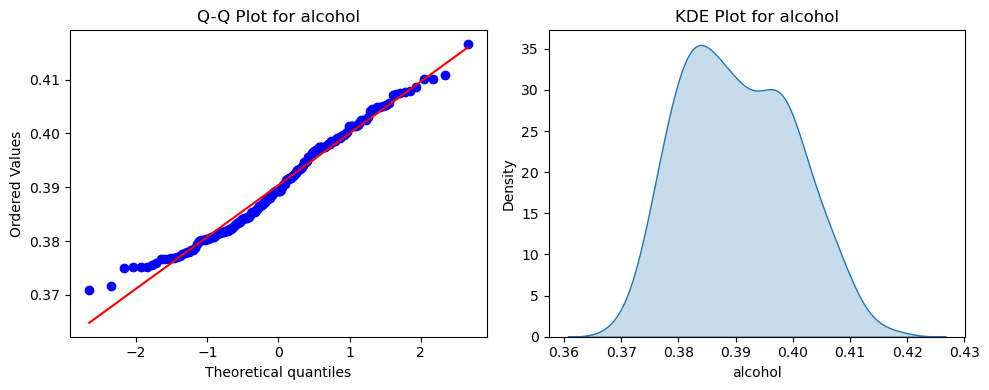

In [18]:
# Reciprocal Transformation
df_1['alcohol'] = 1/df_1['alcohol']
plot_qq_kde(df_1,"alcohol")

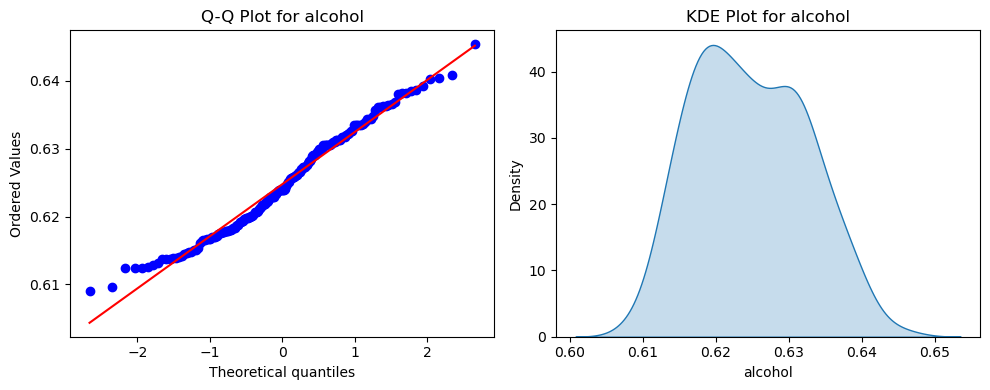

In [19]:
# Square Root Transformation
df_1['alcohol'] = np.sqrt(df_1['alcohol'])
plot_qq_kde(df_1,"alcohol")

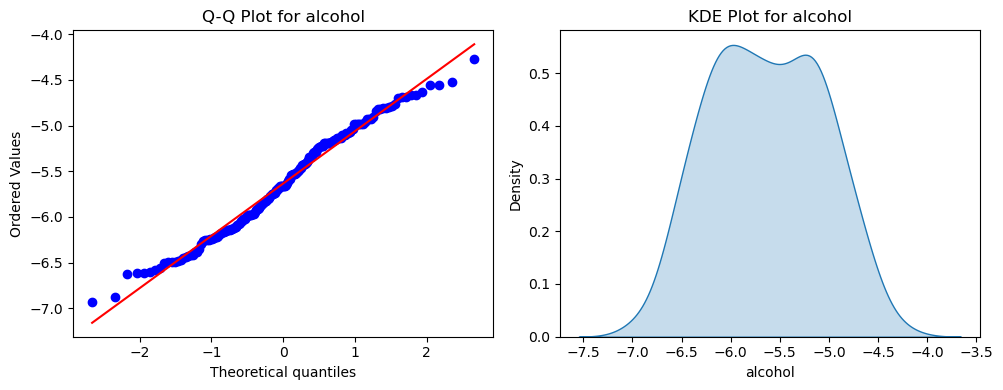

In [20]:
# Box-cox Transformation
df_1['alcohol'],params = stats.boxcox(df_1['alcohol'])
plot_qq_kde(df_1,'alcohol')

In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

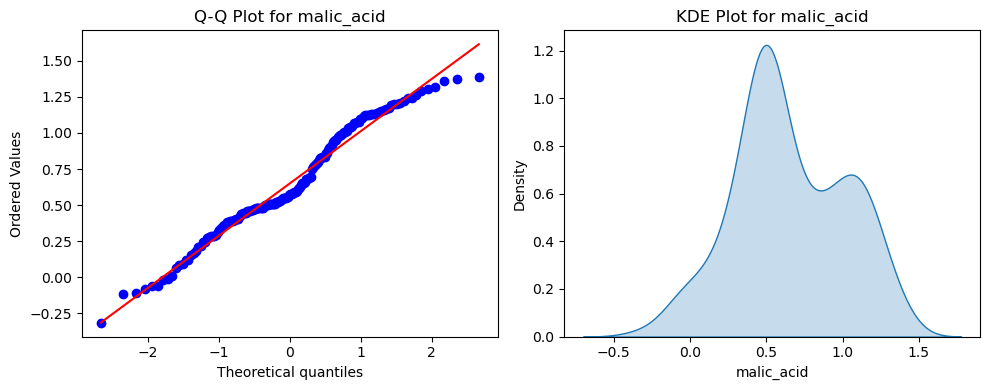

In [22]:
df_1['malic_acid'],params = stats.boxcox(df_1['malic_acid'])
plot_qq_kde(df_1,'malic_acid')

C:\Users\himan\New folder\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himan\AppData\Local\Temp\ipykernel_14168\624531172.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_1[feature], fill=True)


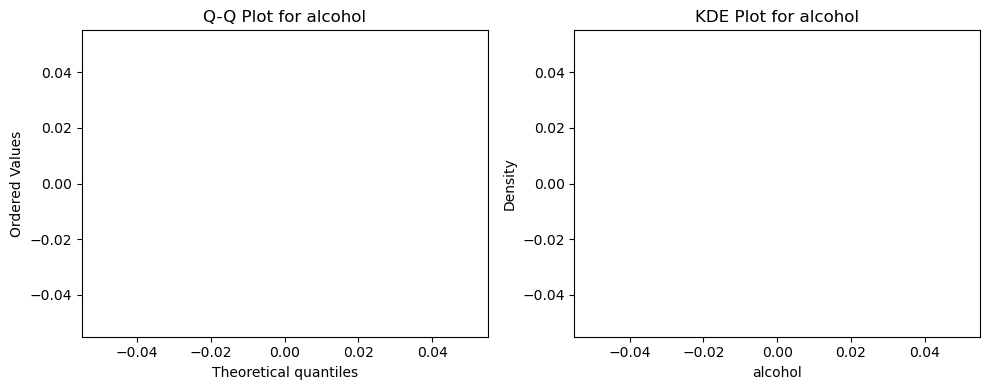

C:\Users\himan\New folder\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


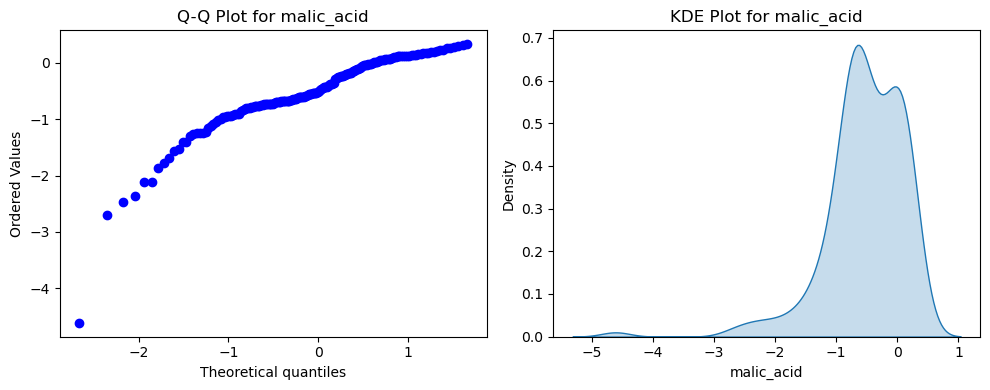

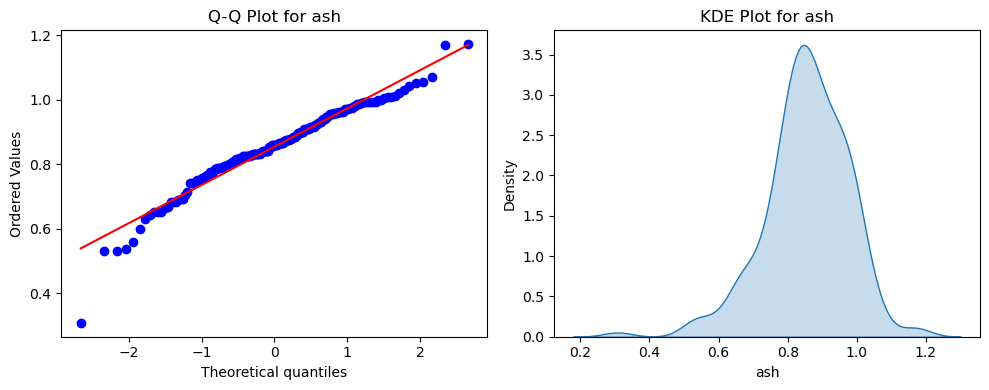

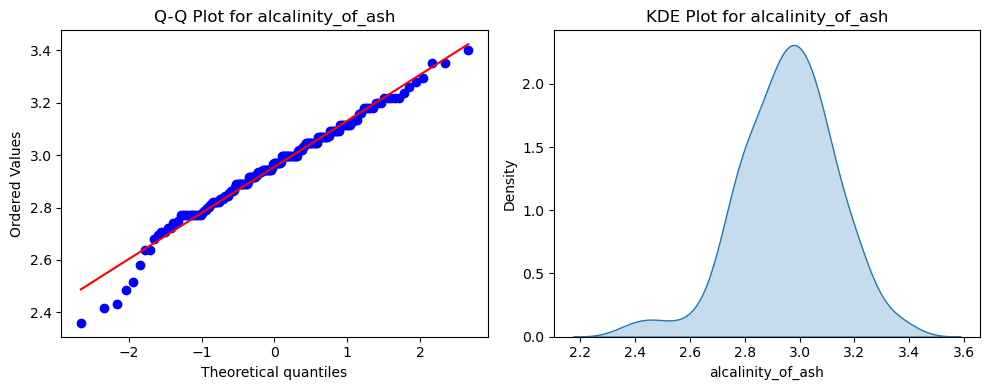

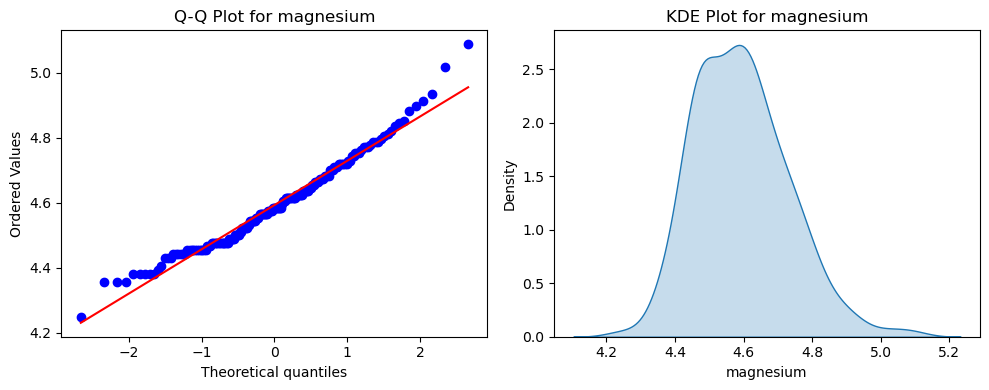

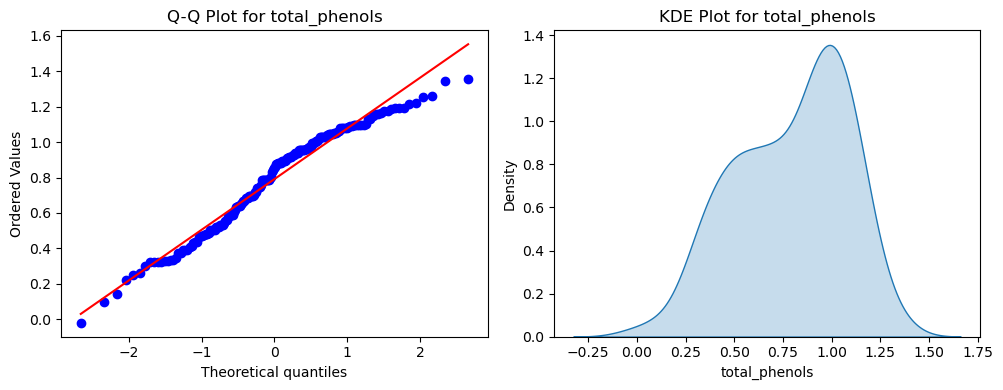

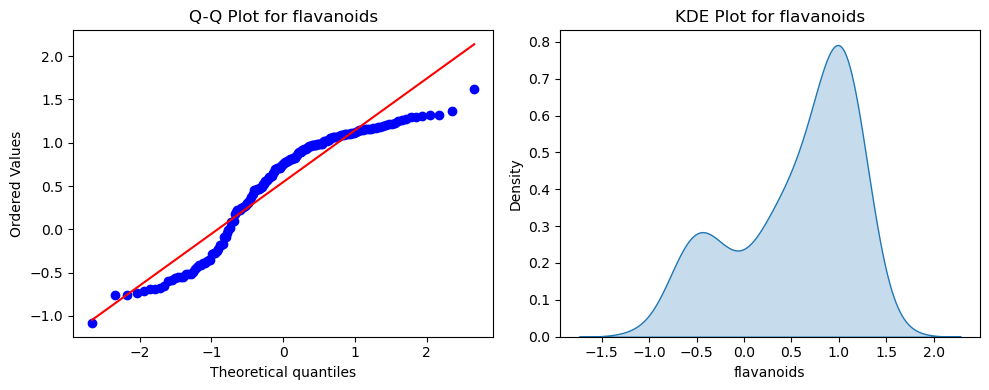

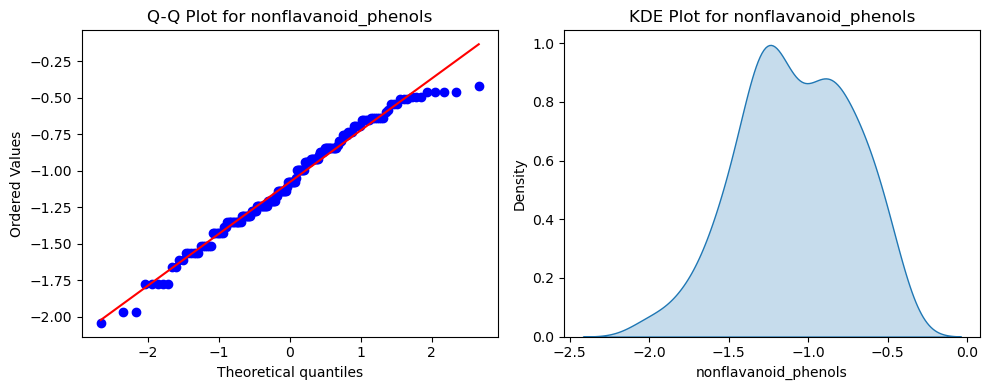

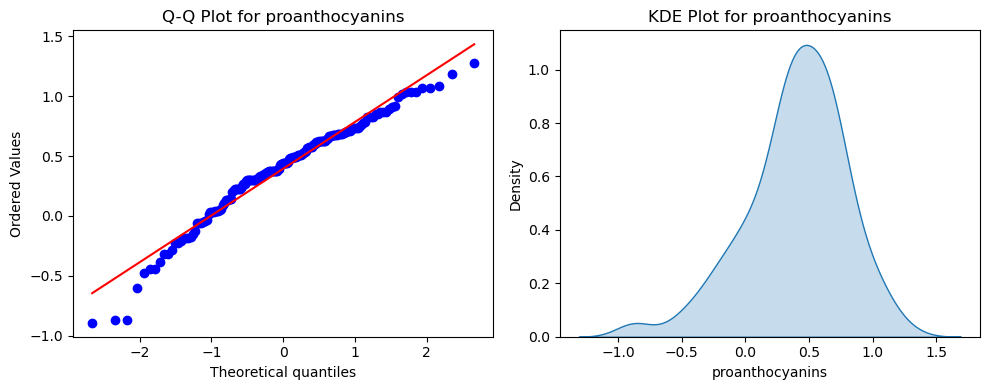

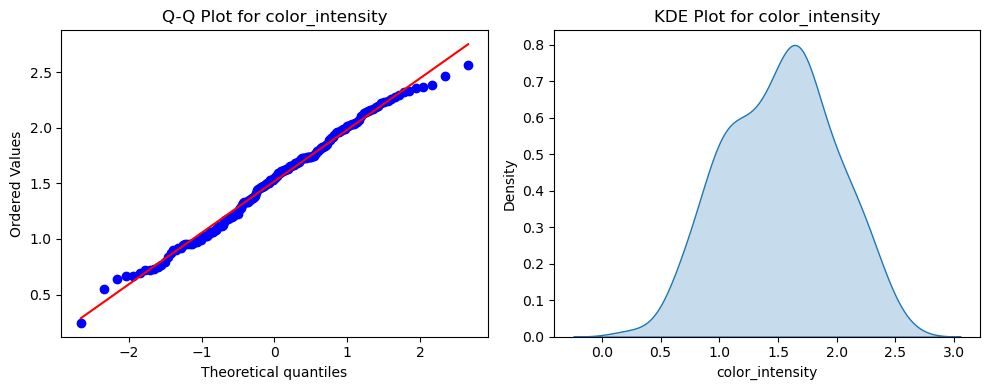

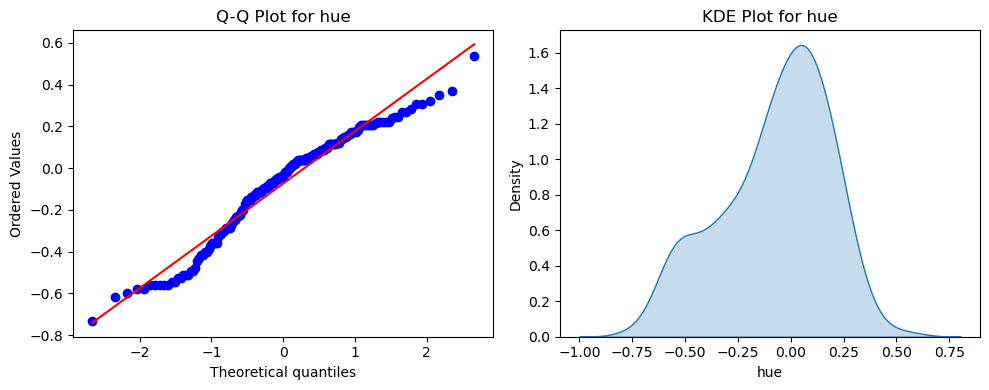

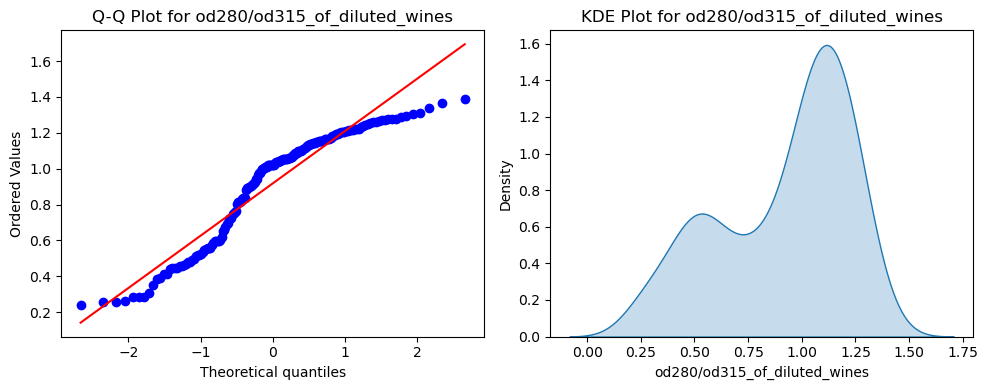

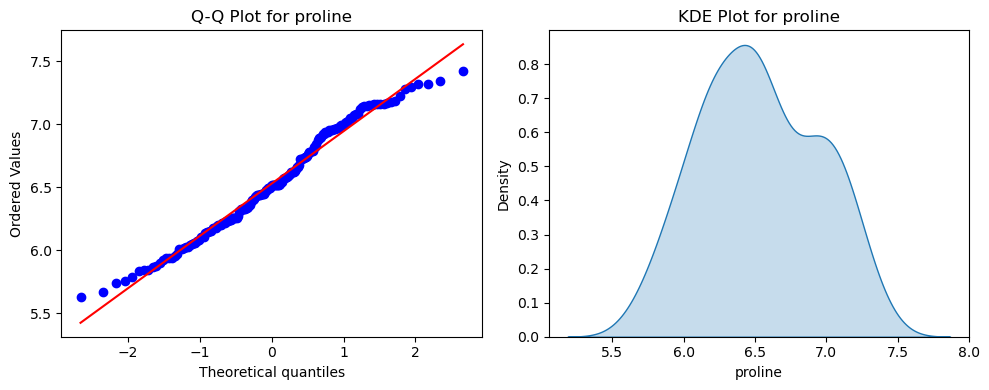

In [23]:
# Logarthmic Transformation
for i in df_1:
    df_1[i]=np.log(df_1[i])
    plot_qq_kde(df_1,i)

C:\Users\himan\AppData\Local\Temp\ipykernel_14168\624531172.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_1[feature], fill=True)


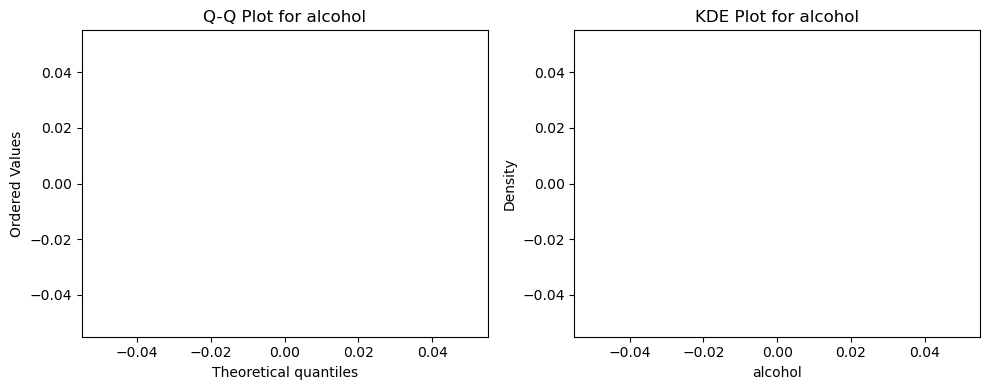

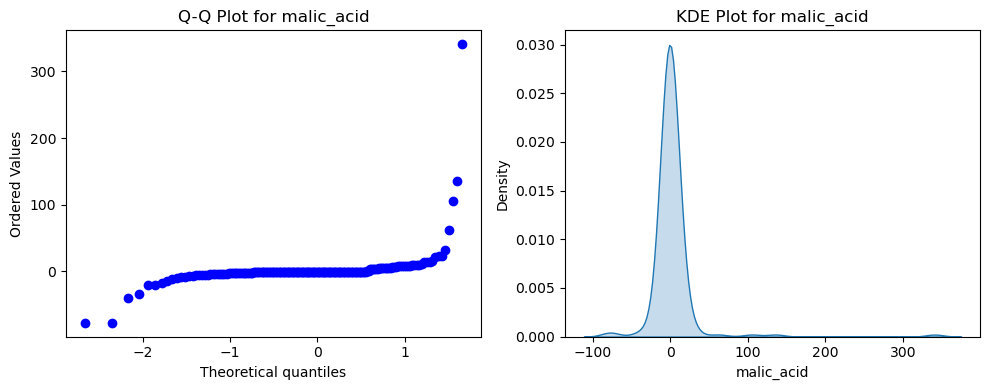

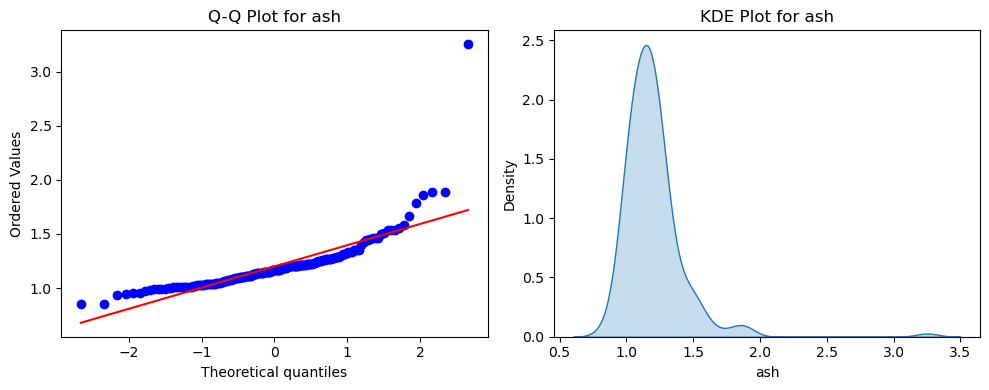

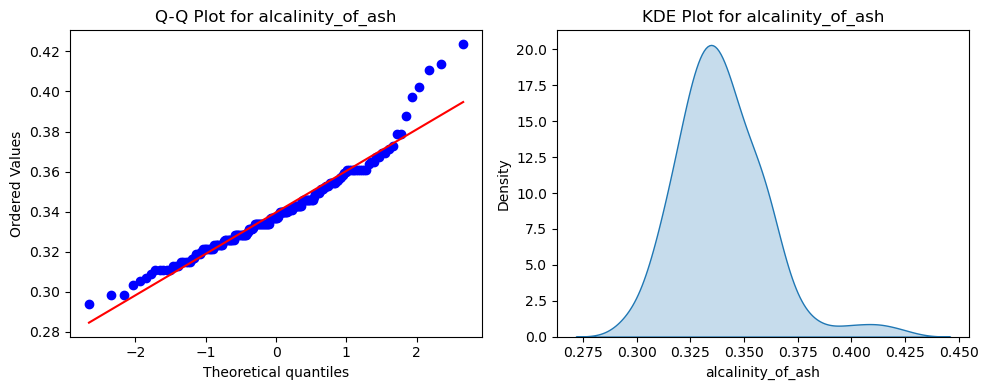

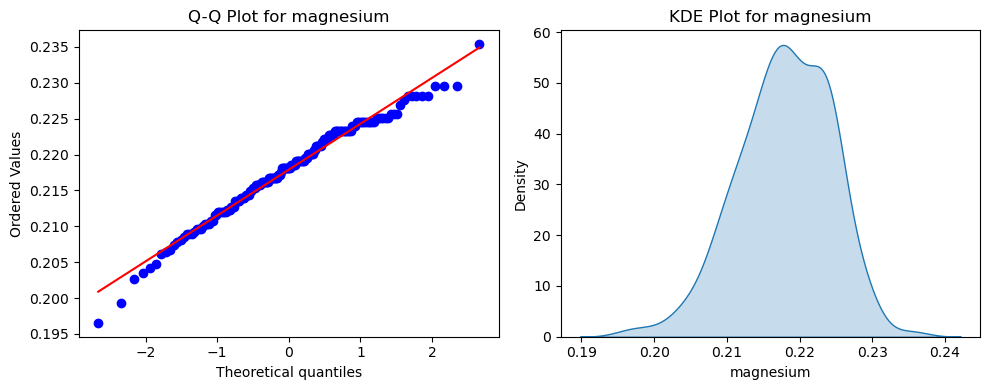

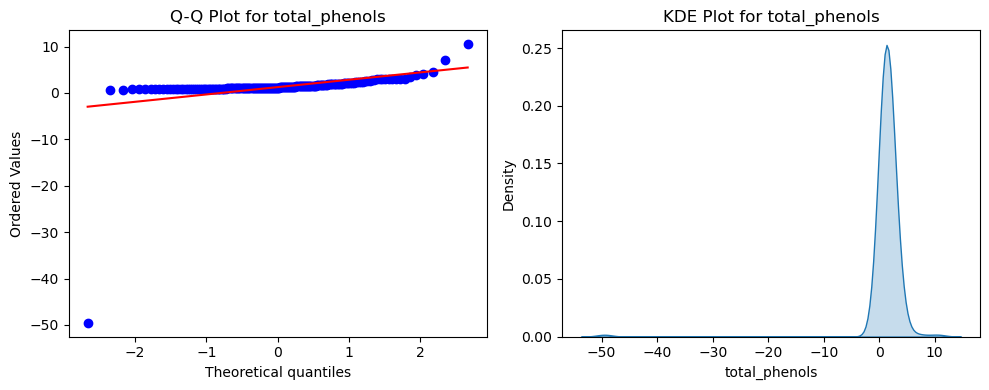

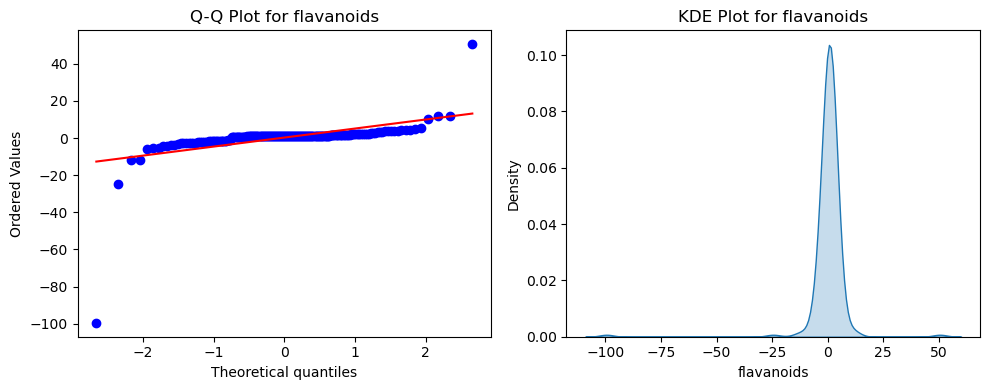

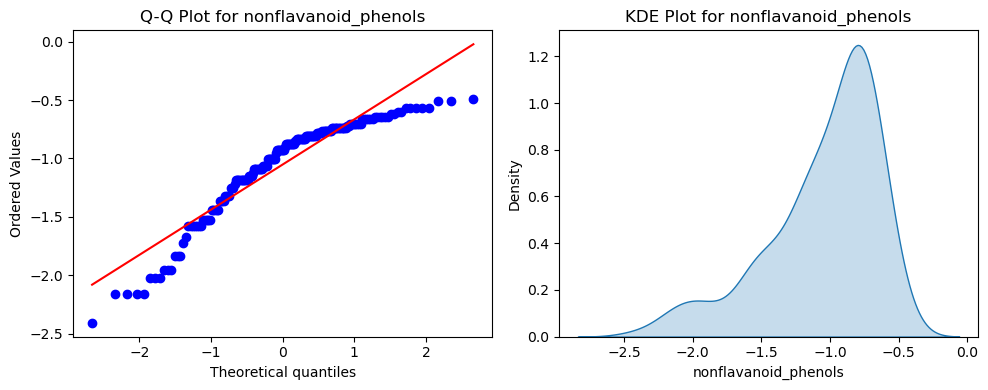

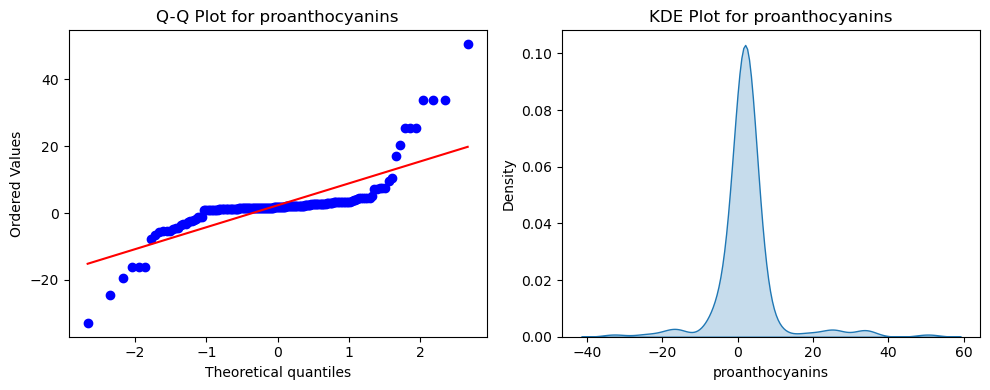

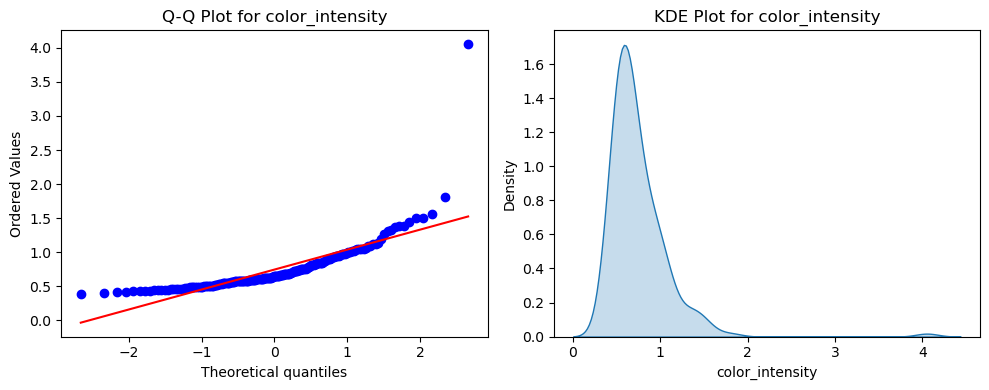

C:\Users\himan\New folder\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


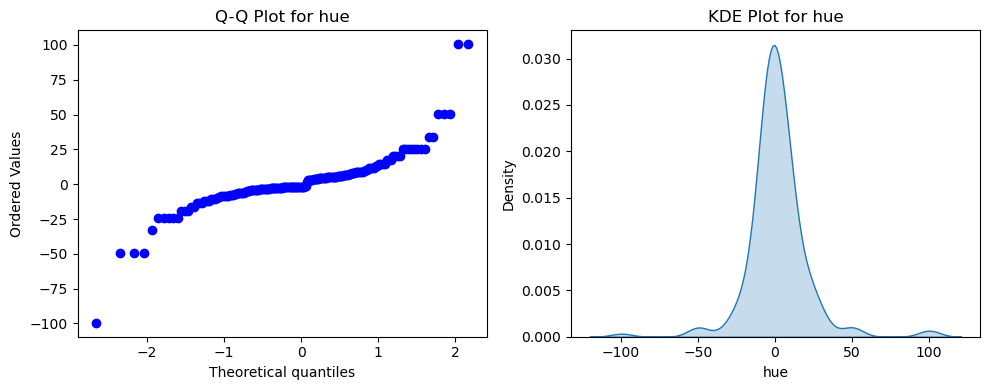

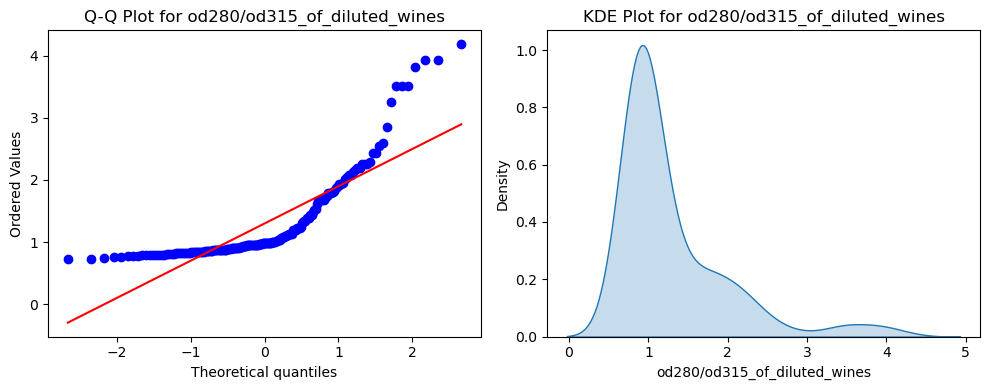

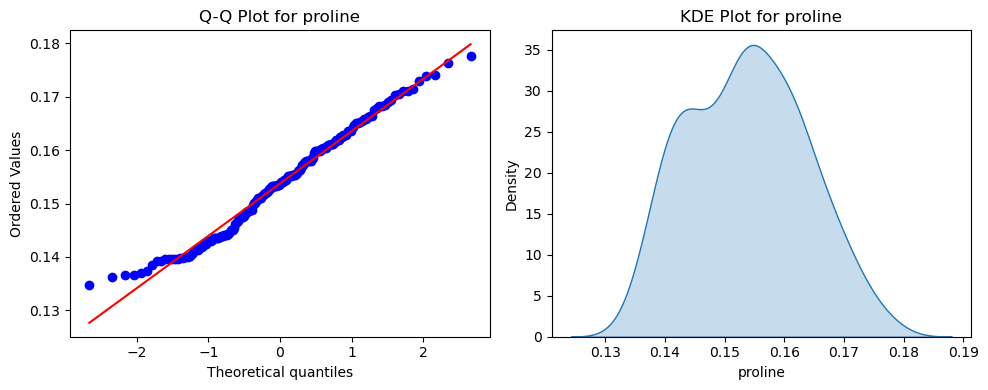

In [26]:
# Reciprocal Transformation
for x in df_1:
    df_1[x]=1/df_1[x]
    plot_qq_kde(df_1,x)